In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
#Load the data set
claimants = pd.read_csv("claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
data= pd.read_csv("claimants.csv")

data1 = pd.read_csv("claimants.csv")
data

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


CASENUM: This represents the unique case number

ATTORNEY: This indicates the name


CLMSEX: This stands for the claimant's sex


CLMINSUR: This column denotes the insurance company

SEATBELT: This indicates whether the claimant was wearing a seatbelt at the time of the incident (1 for yes, 0 for no).


CLMAGE: This represents the age of the claimant.


LOSS: This indicates the financial loss associated with the claim, usually measured in currency units.

In [ ]:
#Shape of the data set
claimants.shape

(1096, 6)

In [ ]:
claimants.CASENUM.unique().shape

# 1283 are discent value 1 does not match another

(1283,)

In [ ]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [ ]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

<ipython-input-7-393d006b4dbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claimants.drop(["CASENUM"],inplace=True,axis = 1)


In [ ]:
# Dividing our data into input and output variables
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [ ]:
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [ ]:
Y

,ATTORNEY
0,0
1,1
2,1
3,0
4,1
...,...
1334,1
1336,0
1337,1
1338,0


In [ ]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)


#LogisticRegression() --- import sklearn.. This method is stored in variable (Classifer)
# x,y Are fix that model

LogisticRegression()

In [ ]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [ ]:
classifier.predict_proba(X)

# predict_proba(): funnction that's actually doing the prediction of probabilities
# Ignore 1st column
# 2nd column predicted probability

array([[9.99996954e-01, 3.04592568e-06],
       [4.92832148e-01, 5.07167852e-01],
       [4.24835532e-01, 5.75164468e-01],
       ...,
       [2.60970584e-01, 7.39029416e-01],
       [7.14046063e-01, 2.85953937e-01],
       [3.19569059e-01, 6.80430941e-01]])

In [ ]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict_proba(X) [:,1], # Changed x to X
                         'y_predictions':y_pred})

#  Actual col y
#  predicted probabilities column
#  predicted class labels (0 or 1) generated by the predict method of the classifier.

In [ ]:
"""
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})     """

In [ ]:
y_pred_df


# Predicted_prob > 05 ------ y_predictions =1
# Predicted_prob < 05 ------ y_predictions =1

,actual,predicted_prob,y_predictions
0,0,0.000003,0
1,1,0.507168,1
2,1,0.575164,1
3,0,0.497716,0
4,1,0.640754,1
...,...,...,...
1334,1,0.712081,1
1336,0,0.425825,0
1337,1,0.739029,1
1338,0,0.285954,0


In [ ]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)                # Y, y_pred = classifier.predict(X)
print (confusion_matrix)

# Tp =381  Tn =197
# Fp =123  Fn =395

[[381 197]
 [123 395]]


In [ ]:
Accuracy =((381+395)/(381+197+123+395))*100
Accuracy

70.8029197080292

In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [ ]:
# ROC Curve

In [ ]:
classifier.predict_proba (X)


# Ignore st column
# 2nd column predicted probability

array([[9.99996954e-01, 3.04592568e-06],
       [4.92832148e-01, 5.07167852e-01],
       [4.24835532e-01, 5.75164468e-01],
       ...,
       [2.60970584e-01, 7.39029416e-01],
       [7.14046063e-01, 2.85953937e-01],
       [3.19569059e-01, 6.80430941e-01]])

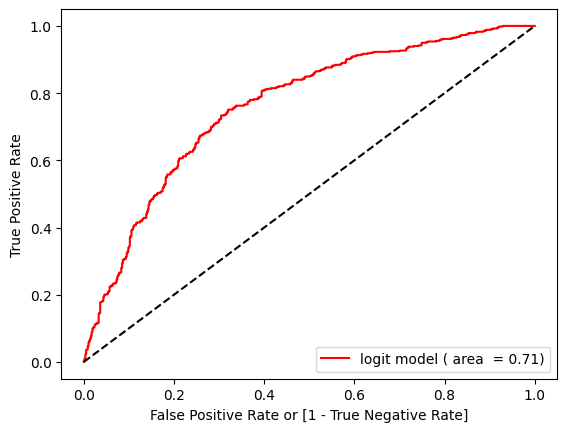

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])           # roc_curve Use probability

auc = roc_auc_score(Y, y_pred)                                                   # auc       Use Predicted values

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)        # false postive rate, True postive rate

plt.plot([0, 1], [0, 1], 'k--')                                                  # k black colour
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')                    # 1 - Specificity
plt.ylabel('True Positive Rate')                                                 # Sensitivity
plt.legend(loc="lower right")



In [ ]:
auc    # red auc

0.7108589063606365